In [6]:
import pandas as pd  # Importa la biblioteca Pandas para trabajar con datos estructurados (manejo de tablas y DataFrames).
from sklearn.model_selection import train_test_split  # Función para dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.feature_extraction.text import CountVectorizer  # Herramienta para convertir texto en vectores de frecuencia de palabras (bolsa de palabras).
from sklearn.naive_bayes import MultinomialNB  # Modelo de clasificación basado en el algoritmo de Naive Bayes Multinomial, útil para datos categóricos como texto.
from sklearn.ensemble import RandomForestClassifier  # Implementa un modelo de clasificación basado en un conjunto de árboles de decisión (Random Forest).
from sklearn.svm import SVC  # Implementa un modelo de clasificación basado en Máquinas de Soporte Vectorial (Support Vector Machines).
from sklearn.metrics import classification_report, confusion_matrix  # Herramientas para evaluar modelos de clasificación, generan métricas y una matriz de confusión.
import matplotlib.pyplot as plt  # Biblioteca para crear gráficos y visualizar datos de manera flexible y detallada.
import seaborn as sns  # Extensión de Matplotlib para generar gráficos más atractivos y fáciles de usar, útil para análisis exploratorio.

In [8]:
file_path = "Reviews.csv"
 # Define la ruta al archivo CSV que contiene los datos; en este caso, se llama 'Reviews.csv'.
df = pd.read_csv(file_path)  # Carga el archivo CSV en un DataFrame de Pandas, permitiendo manipular y analizar los datos de forma estructurada.

In [9]:
print("\nColumnas disponibles en el dataset:")
print(df.columns.tolist())


Columnas disponibles en el dataset:
['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


mostrar la cabecera del dataset


In [11]:
print("\nPrimeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought

selecciono las columnas text y score

In [12]:
# Seleccionamos solo las columnas relevantes
df = df[['Text', 'Score']]

# Mostramos las primeras filas para confirmar
print(df.head())


                                                Text  Score
0  I have bought several of the Vitality canned d...    5.0
1  Product arrived labeled as Jumbo Salted Peanut...    1.0
2  This is a confection that has been around a fe...    4.0
3  If you are looking for the secret ingredient i...    2.0
4  Great taffy at a great price.  There was a wid...    5.0


creo la columna de sentimiento

In [13]:
# Creamos la columna 'Sentiment' basada en la puntuación
def get_sentiment(score):
    if score >= 4:
        return "positive"
    elif score == 3:
        return "neutral"
    else:
        return "negative"

# Aplicamos la función a la columna 'Score'
df['Sentiment'] = df['Score'].apply(get_sentiment)

# Mostramos las primeras filas para verificar
print(df.head())


                                                Text  Score Sentiment
0  I have bought several of the Vitality canned d...    5.0  positive
1  Product arrived labeled as Jumbo Salted Peanut...    1.0  negative
2  This is a confection that has been around a fe...    4.0  positive
3  If you are looking for the secret ingredient i...    2.0  negative
4  Great taffy at a great price.  There was a wid...    5.0  positive


mostramos la distribucion de sentimiento

In [14]:
# Contamos cuántos registros hay por cada tipo de sentimiento
print("Distribución de sentimientos:")
print(df['Sentiment'].value_counts())

# Mostramos el porcentaje de cada categoría
print("\nPorcentaje por categoría:")
print(df['Sentiment'].value_counts(normalize=True) * 100)


Distribución de sentimientos:
Sentiment
positive    200047
negative     37661
neutral      20189
Name: count, dtype: int64

Porcentaje por categoría:
Sentiment
positive    77.568564
negative    14.603117
neutral      7.828319
Name: proportion, dtype: float64


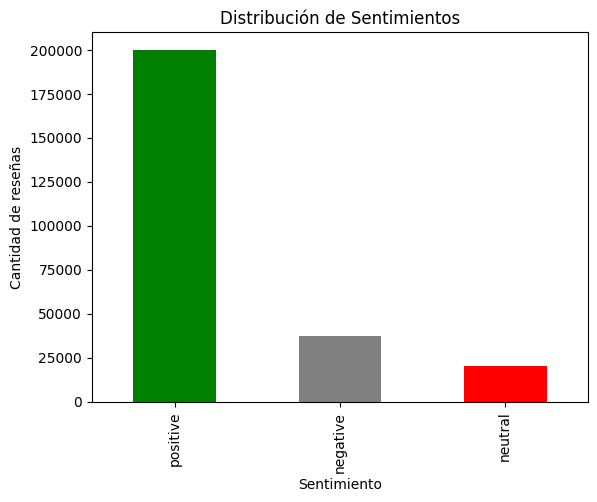

In [15]:
import matplotlib.pyplot as plt

# Visualizamos la distribución de sentimientos
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de reseñas')
plt.show()


punto 2 Preguntas rápidas para reflexión:
 ¿Qué tipo de datos encontramos en las columnas?
 ¿Cuál es la proporción de reseñas positivas vs. negativas?

In [16]:
# Ver los tipos de datos de cada columna
print(df.dtypes)

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Text          object
Score        float64
Sentiment     object
dtype: object

Valores nulos por columna:
Text         1
Score        1
Sentiment    0
dtype: int64


| Columna       | Tipo de dato | Qué significa                                                                                             | Cómo se usa                                                         |
| ------------- | ------------ | --------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------- |
| **Text**      | `object`     | Son **cadenas de texto** (las reseñas escritas por los clientes).                                         | Es la **variable de entrada (X)** para el modelo.                   |
| **Score**     | `float64`    | Son **números decimales** que representan la puntuación o calificación (por ejemplo, de 1 a 5 estrellas). | Se usa para crear la **etiqueta de sentimiento**.                   |
| **Sentiment** | `object`     | Texto que indica el sentimiento (positivo, negativo o neutral).                                           | Es la **variable objetivo (y)** que el modelo aprenderá a predecir. |


| Columna       | Valores nulos | Interpretación                                                                          |
| ------------- | ------------- | --------------------------------------------------------------------------------------- |
| **Text**      | 1             | Hay **una reseña vacía o faltante**. Se puede eliminar sin problema.                    |
| **Score**     | 1             | También hay **una puntuación faltante**. Se puede eliminar para no afectar el análisis. |
| **Sentiment** | 0             | Perfecto , todas las reseñas tienen asignado un sentimiento.                           |


In [17]:
# Eliminar filas con valores nulos en Text o Score
df = df.dropna(subset=["Text", "Score"])

# Confirmar que ya no hay valores nulos
print("Valores nulos restantes por columna:")
print(df.isnull().sum())


Valores nulos restantes por columna:
Text         0
Score        0
Sentiment    0
dtype: int64


In [18]:
# Calcular la cantidad de reseñas por tipo de sentimiento
conteo_sentimientos = df["Sentiment"].value_counts()

# Calcular los porcentajes
porcentaje_sentimientos = df["Sentiment"].value_counts(normalize=True) * 100

# Mostrar ambos resultados
print("Cantidad de reseñas por sentimiento:\n", conteo_sentimientos)
print("\nPorcentaje de reseñas por sentimiento:\n", porcentaje_sentimientos)


Cantidad de reseñas por sentimiento:
 Sentiment
positive    200047
negative     37660
neutral      20189
Name: count, dtype: int64

Porcentaje de reseñas por sentimiento:
 Sentiment
positive    77.568865
negative    14.602786
neutral      7.828349
Name: proportion, dtype: float64


Pregunta 2: ¿Cuál es la proporción de reseñas positivas vs negativas?


Al analizar la distribución de los sentimientos en el dataset, se observa lo siguiente:

77.57 % de las reseñas son positivas,

14.60 % son negativas, y

7.83 % son neutrales.

Esto indica que la mayoría de los clientes manifestaron experiencias favorables con el producto o servicio, mientras que una proporción menor expresó opiniones negativas o neutrales.

Desde el punto de vista del modelado, esta distribución muestra un fuerte desbalance de clases, donde predominan las reseñas positivas. Esto puede afectar el desempeño del modelo, ya que tenderá a predecir con mayor facilidad la clase “positiva”.

Por ello, en fases posteriores se podrían aplicar técnicas de balanceo de datos (como sobremuestreo o ajuste de pesos por clase) para mejorar la capacidad del modelo de reconocer sentimientos negativos y neutrales.

División de los datos en entrenamiento y prueba

Primero, separaremos las columnas que vamos a usar:

X → el texto de las reseñas (Text)

y → el sentimiento (Sentiment)

Y luego dividiremos el dataset para que:

una parte (por ejemplo, el 80%) se use para entrenar el modelo,

y la otra (el 20%) para evaluarlo.

In [19]:
from sklearn.model_selection import train_test_split

# Definir variables independientes (X) y dependientes (y)
X = df["Text"]      # Reseñas (texto)
y = df["Sentiment"] # Sentimiento (positivo, negativo, neutral)

# Dividir en datos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirmar el tamaño de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])


Tamaño del conjunto de entrenamiento: 206316
Tamaño del conjunto de prueba: 51580


Paso 2. Vectorización del texto con CountVectorizer

Como los modelos de machine learning no entienden texto, solo números, debemos transformar las palabras en una representación numérica.

Una forma básica y muy usada es el modelo de “bolsa de palabras” (Bag of Words) con CountVectorizer, que:

Extrae todas las palabras únicas del texto.

Crea una columna para cada palabra.

Cuenta cuántas veces aparece cada palabra en cada reseña.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear el vectorizador
vectorizer = CountVectorizer(stop_words='english')  # eliminamos palabras comunes (the, and, etc.)

# Ajustar el vectorizador y transformar los datos de entrenamiento
X_train_vect = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba (sin volver a ajustar)
X_test_vect = vectorizer.transform(X_test)

# Mostrar dimensiones
print("Dimensiones de X_train_vect:", X_train_vect.shape)
print("Dimensiones de X_test_vect:", X_test_vect.shape)


Dimensiones de X_train_vect: (206316, 77815)
Dimensiones de X_test_vect: (51580, 77815)


Interpretación de las dimensiones

X_train_vect: (206,316, 77,815)
X_test_vect: (51,580, 77,815)

Esto quiere decir que:

Elemento	Significado
206,316 / 51,580	Número de reseñas (filas) en entrenamiento y prueba, respectivamente.
77,815	Número de palabras únicas (características) que el vectorizador detectó en todo el texto.

lo que quiere decir:

Cada reseña se convierte en una fila.

Cada palabra única se convierte en una columna.

En las celdas hay un conteo de cuántas veces aparece esa palabra en la reseña.

Entrenamiento del modelo

In [21]:
from sklearn.naive_bayes import MultinomialNB

# Crear el modelo Naive Bayes
nb_model = MultinomialNB()

# Entrenar el modelo con los datos vectorizados
nb_model.fit(X_train_vect, y_train)

print("✅ Modelo Naive Bayes entrenado correctamente.")


✅ Modelo Naive Bayes entrenado correctamente.


en este paso MultinomialNB() crea un modelo basado en la probabilidad de ocurrencia de palabras.

fit(X_train_vect, y_train) hace que el modelo “aprenda” cómo las combinaciones de palabras se asocian con sentimientos positivos, negativos o neutros.

Por ejemplo:

Si ve palabras como excellent, great, love, aprende que suelen estar en reseñas positivas.

Si ve terrible, waste, bad, las asocia con reseñas negativas.

Evaluar el modelo

🔹 Reporte de clasificación:

              precision    recall  f1-score   support

    negative       0.66      0.63      0.65      7532
     neutral       0.37      0.28      0.32      4038
    positive       0.90      0.93      0.91     40010

    accuracy                           0.83     51580
   macro avg       0.64      0.61      0.63     51580
weighted avg       0.82      0.83      0.83     51580



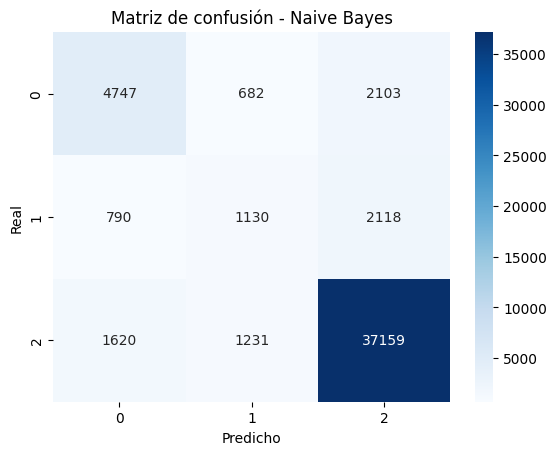

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Hacer predicciones sobre el conjunto de prueba
y_pred = nb_model.predict(X_test_vect)

# Mostrar métricas de evaluación
print("🔹 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# Mostrar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - Naive Bayes")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


aca vemos : Reporte de clasificación con:

precision: porcentaje de aciertos por clase

recall: cuántos positivos detectó correctamente

f1-score: equilibrio entre ambas

support: cantidad de ejemplos por clase

Matriz de confusión:

Muestra cuántas reseñas positivas, negativas y neutras fueron correctamente clasificadas y cuántas se confundieron.

| Métrica       | Qué significa                                                                            |
| ------------- | ---------------------------------------------------------------------------------------- |
| **Precision** | De todas las reseñas que el modelo *predijo* como una clase, ¿cuántas acertó?            |
| **Recall**    | De todas las reseñas que *realmente* eran de esa clase, ¿cuántas detectó bien el modelo? |
| **F1-score**  | Promedio balanceado entre precisión y recall (valores cercanos a 1 son mejores).         |
| **Support**   | Cuántos ejemplos había de cada clase en el conjunto de prueba.                           |


| Sentimiento                       | Precisión    | Recall                                                                                                                                          | F1-score | Interpretación |
| --------------------------------- | ------------ | ----------------------------------------------------------------------------------------------------------------------------------------------- | -------- | -------------- |
| **Positivo (0.90 / 0.93 / 0.91)** | Muy alto ✅   | El modelo identifica muy bien las reseñas positivas. Esto se debe a que había muchas en el dataset (el modelo tuvo más ejemplos para aprender). |          |                |
| **Negativo (0.66 / 0.63 / 0.65)** | Aceptable ⚠️ | El modelo acierta bastante con las reseñas negativas, aunque confunde algunas con positivas.                                                    |          |                |
| **Neutral (0.37 / 0.28 / 0.32)**  | Bajo ❌       | Le cuesta distinguir las reseñas neutras, probablemente porque hay menos ejemplos y el lenguaje es más ambiguo.                                 |          |                |


Métricas generales

Accuracy general: 0.83 (83%) → Muy buen resultado para un modelo básico como Naive Bayes.

Macro avg (0.63) → Promedio simple entre clases (mide equidad).

Weighted avg (0.83) → Promedio ponderado según cuántos ejemplos tiene cada clase.

Es alto porque la clase positiva domina el dataset.

Conclusión

este modelo:

Aprende muy bien los positivos ✅

Reconoce moderadamente los negativos ⚠️

Tiene dificultades con los neutros ❌

Esto es totalmente esperado en datasets desbalanceados, donde los positivos son mayoría.

Paso 5: Probar el modelo con reseñas nuevas

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vect, y_train)


LogisticRegression(max_iter=1000)

In [25]:
# Ejemplo de nuevas reseñas
nuevas_reseñas = [
    "El producto es excelente, llegó rápido y funciona perfecto.",
    "No me gustó, vino dañado y el servicio fue pésimo.",
    "Está bien, cumple lo que promete pero nada especial."
]

# Convertir el texto a vectores usando el mismo vectorizador
nuevas_vect = vectorizer.transform(nuevas_reseñas)

# Hacer las predicciones
predicciones = model.predict(nuevas_vect)

# Mostrar resultados
for texto, sentimiento in zip(nuevas_reseñas, predicciones):
    print(f"Reseña: {texto}")
    print(f"Predicción del modelo: {sentimiento}")
    print("-" * 50)


Reseña: El producto es excelente, llegó rápido y funciona perfecto.
Predicción del modelo: positive
--------------------------------------------------
Reseña: No me gustó, vino dañado y el servicio fue pésimo.
Predicción del modelo: positive
--------------------------------------------------
Reseña: Está bien, cumple lo que promete pero nada especial.
Predicción del modelo: positive
--------------------------------------------------


este es un resultado típico cuando el modelo se entrenó con un dataset desbalanceado, como el tuyo (recuerda: 77 % positivas, 15 % negativas y 8 % neutras).

Por eso predice “positive” para casi todo — aprendió a “jugar a lo seguro” y decir que todo es positivo, porque así acierta en la mayoría de los casos, lo que quiere decir que el modelo sí funciona (clasifica texto en sentimientos).

Pero no está equilibrado, así que no entiende bien los casos negativos o neutros.